In [ ]:
#lab-eda-univariate

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [ ]:
# df.to_pickle("dataset.pkl")

In [2]:
df = df_loaded = pd.read_pickle("dataset.pkl")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [7]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Generate a frequency table for the product category

In [8]:
df['category'].nunique()

296

In [9]:
category_frequency = df['category'].value_counts()

In [10]:
category_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Which are the top 5 most listed product categories?

In [11]:
category_frequency.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

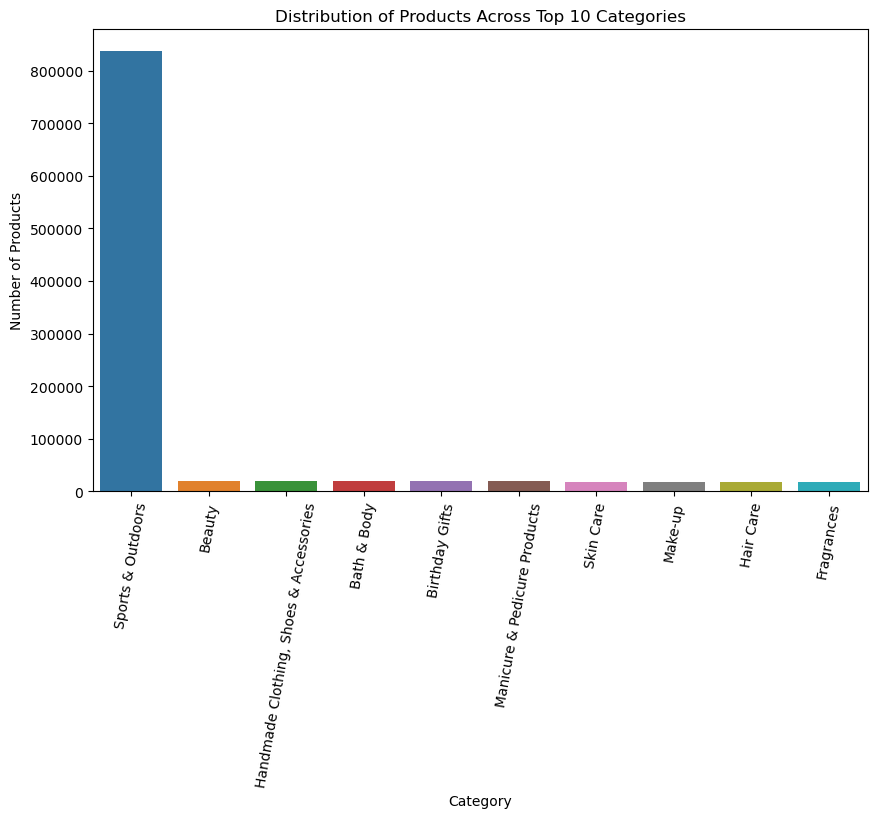

In [13]:
# I am going to plot the top 10 cateogories
top_10_categories = category_frequency.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.title('Distribution of Products Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=80)
plt.show()

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

([<matplotlib.patches.Wedge at 0x2162af4f5d0>,
 [Text(-1.0619894641325325, 0.2866677136886831, 'Sports & Outdoors'),
  Text(0.9852466974708041, -0.48917169288796164, 'Beauty'),
  Text(1.0412846831644893, -0.3545789173188805, 'Handmade Clothing, Shoes & Accessories'),
  Text(1.0788687885174035, -0.21457431617737963, 'Bath & Body'),
  Text(1.0976547688734235, -0.07179142267312413, 'Birthday Gifts')])

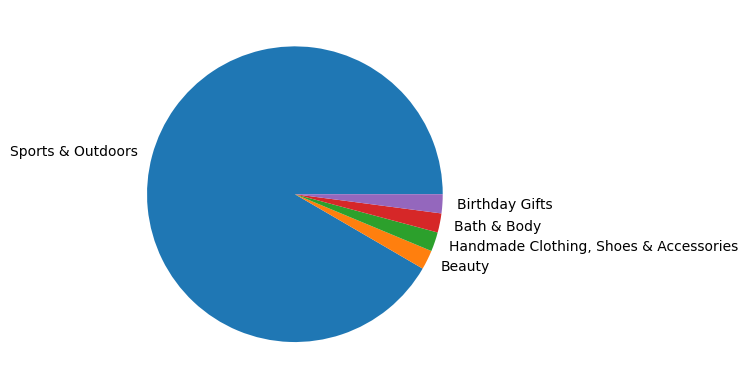

In [14]:
# I will use the top 5 product categories
top_5_categories = category_frequency.head(5)
plt.pie(top_5_categories, labels=top_5_categories.index)


In [15]:
# Percentage of top 5 frequent categories
top_5_categories/top_5_categories.sum()*100

category
Sports & Outdoors                         91.607732
Beauty                                     2.115512
Handmade Clothing, Shoes & Accessories     2.106420
Bath & Body                                2.091412
Birthday Gifts                             2.078924
Name: count, dtype: float64

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Calculate the mean, median, and mode for the price of products.

In [16]:
print('Mean:', df['price'].mean())
print('Median:', df['price'].median())
print('Mode:', df['price'].mode())

Mean: 89.24380943923663
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64


What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [17]:
#The average price point, 89.24, is higher than the most common price point, 9.99

Determine the variance, standard deviation, range, and interquartile range for product price.

In [18]:
print('Variance:', df['price'].var())
print('Stand. deviation:', df['price'].std())
print('Range:', df['price'].max() - df['price'].min())

Variance: 119445.48532256528
Stand. deviation: 345.60886175352226
Range: 100000.0


In [19]:
interquartile_range = np.percentile(df['price'], 75) - np.percentile(df['price'], 25)
print('IQR:', interquartile_range)

IQR: 36.0


How varied are the product prices? Are there any indicators of a significant spread in prices?

In [20]:
#There is a significant spread in prices. The high variance, standard deviation, and large range suggest that prices 
# vary considerably across different products. 

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

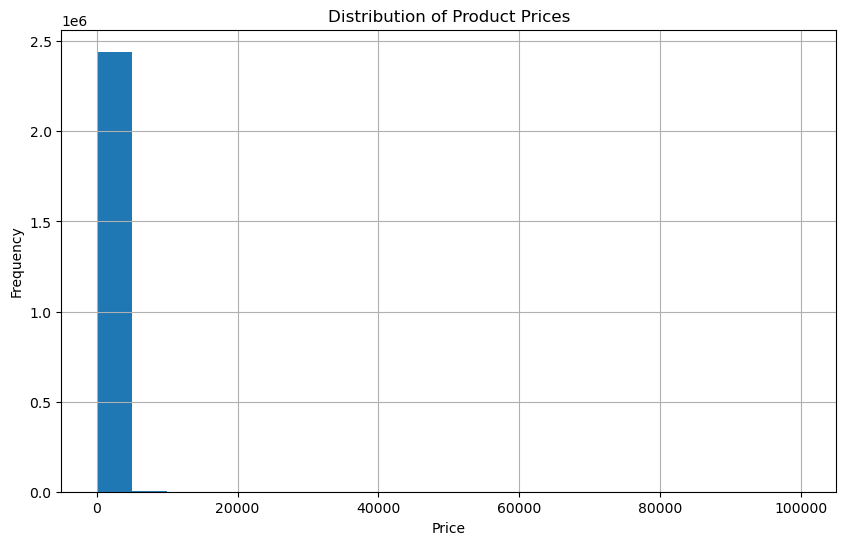

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

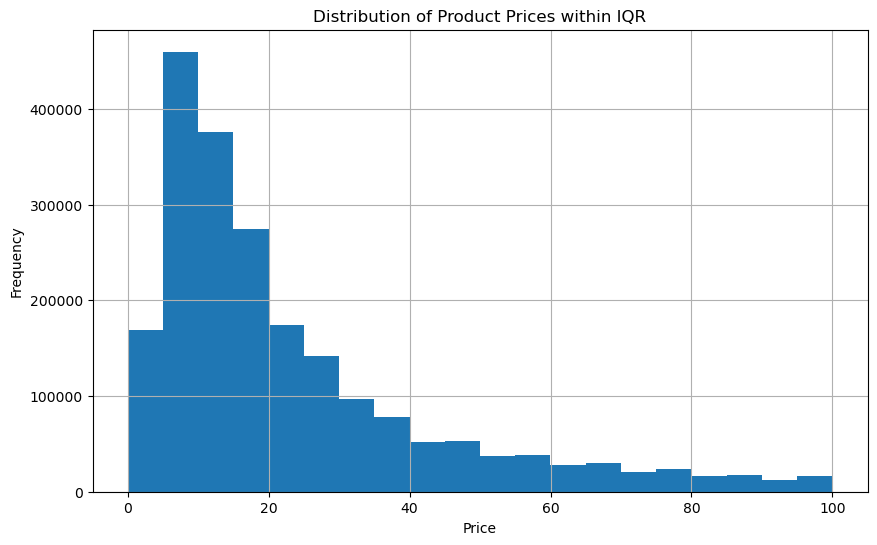

In [22]:
# I think the plot is hard to visualize because there are some outliers greatly affecting the data.
# We could plot a histogram with the values within the IQR:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds of IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter values within the IQR
prices_within_IQR = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]['price']

# Ploting the histogram
plt.figure(figsize=(10, 6))
plt.hist(prices_within_IQR, bins=20)
plt.title('Distribution of Product Prices within IQR')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

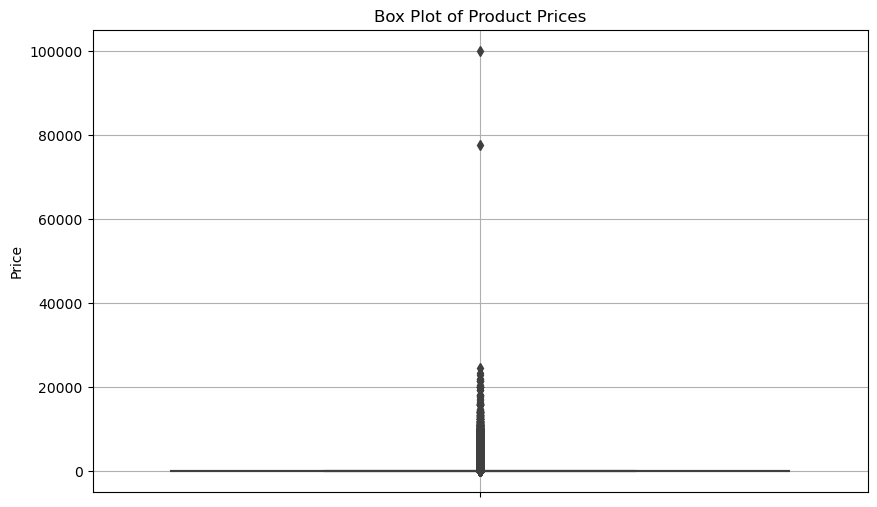

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price')
plt.title('Box Plot of Product Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [24]:
# Yes, as suspected, there are some outliers in the product pricing column.

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings? 

Calculate the mean, median, and mode for the rating of products.

In [25]:
print('Mean:', df['stars'].mean())
print('Median:', df['stars'].median())
print('Mode:', df['stars'].mode())

Mean: 2.152836472966065
Median: 0.0
Mode: 0    0.0
Name: stars, dtype: float64


In [26]:
df['stars'].max()

5.0

How do customers generally rate products? Is there a common trend?

In [27]:
# The most common rating is 0 stars. 

Determine the variance, standard deviation, and interquartile range for product rating.

In [28]:
print('Variance:', df['stars'].var())
print('Stand. deviation:', df['stars'].std())
print('Range:', df['stars'].max() - df['stars'].min())

Variance: 4.81743402976196
Stand. deviation: 2.1948653785054697
Range: 5.0


In [29]:
interquartile_range = np.percentile(df['stars'], 75) - np.percentile(df['stars'], 25)
print('IQR:', interquartile_range)

IQR: 4.4


Are the ratings consistent, or is there a wide variation in customer feedback?

In [30]:
#There is evidence of variability in customer feedback, as indicated by the relatively high variance and standard deviation. 

Calculate the skewness and kurtosis for the rating column.

In [31]:
print('Skewness:', df['stars'].skew())
print('Kurtosis:', df['stars'].kurtosis())

Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985


Are the ratings normally distributed, or do they lean towards higher or lower values?

In [32]:
#The skewness value of approximately 0.081 suggests that the distribution of ratings is close to symmetric. 
#The positive value indicates a longer or fatter tail on the right side of the distribution

#The kurtosis value of approximately -1.926 suggests that the distribution of ratings is platykurtic, meaning it has 
#lighter tails than a normal distribution.

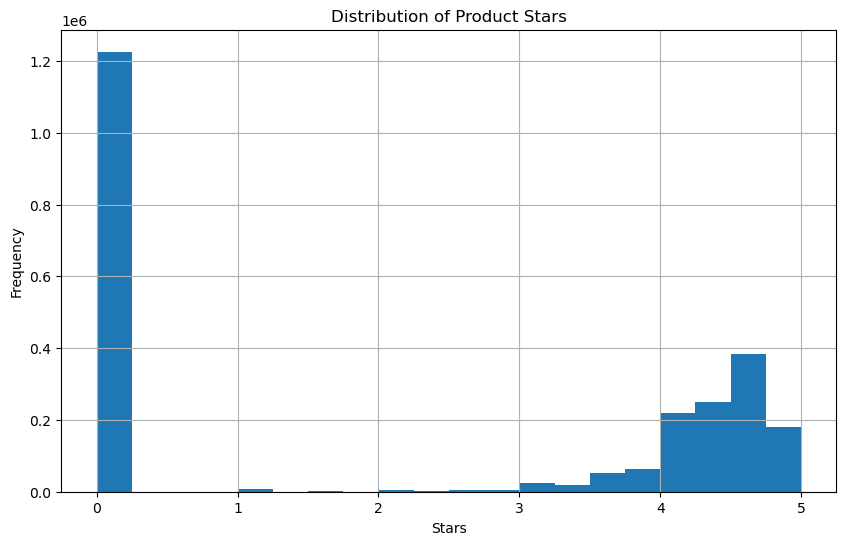

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=20)
plt.title('Distribution of Product Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# As we saw earlier, 0 stars is the most frequent product rating by customers. 